In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("loan_approval_dataset.csv")

In [5]:
df

loan_id  income_annum  loan_amount  loan_term  cibil_score  \
0           1       9600000     29900000         12          778   
1           2       4100000     12200000          8          417   
2           3       9100000     29700000         20          506   
3           4       8200000     30700000          8          467   
4           5       9800000     24200000         20          382   
...       ...           ...          ...        ...          ...   
4264     4265       1000000      2300000         12          317   
4265     4266       3300000     11300000         20          559   
4266     4267       6500000     23900000         18          457   
4267     4268       4100000     12800000          8          780   
4268     4269       9200000     29700000         10          607   

      residential_assets_value  bank_asset_value loan_status  
0                      2400000           8000000    Approved  
1                      2700000           3300000    Rejected  
2                      7100000          12800000    Rejected  
3                     18200000           7900000    Rejected  
4                     12400000           5000000    Rejected  
...                        ...               ...         ...  
4264                   2800000            800000    Rejected  
4265                   4200000           1900000    Approved  
4266                   1200000           7300000    Rejected  
4267                   8200000           5800000    Approved  
4268                  17800000          12000000    Approved  

[4269 rows x 8 columns]

In [32]:
x=df.drop(columns=['loan_id','loan_status'])
x

income_annum  loan_amount  loan_term  cibil_score  \
0          9600000     29900000         12          778   
1          4100000     12200000          8          417   
2          9100000     29700000         20          506   
3          8200000     30700000          8          467   
4          9800000     24200000         20          382   
...            ...          ...        ...          ...   
4264       1000000      2300000         12          317   
4265       3300000     11300000         20          559   
4266       6500000     23900000         18          457   
4267       4100000     12800000          8          780   
4268       9200000     29700000         10          607   

      residential_assets_value  bank_asset_value  
0                      2400000           8000000  
1                      2700000           3300000  
2                      7100000          12800000  
3                     18200000           7900000  
4                     12400000           5000000  
...                        ...               ...  
4264                   2800000            800000  
4265                   4200000           1900000  
4266                   1200000           7300000  
4267                   8200000           5800000  
4268                  17800000          12000000  

[4269 rows x 6 columns]

In [34]:
y=df.loan_status

In [8]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
X_train

income_annum  loan_amount  loan_term  cibil_score  \
1675       7900000     29900000          6          568   
1164       9600000     34000000         12          710   
192         800000      2900000          8          682   
910        4900000     13100000         18          754   
567        3000000     11100000         12          441   
...            ...          ...        ...          ...   
3444       1300000      4700000         16          530   
466         500000      1800000         18          411   
3092       8600000     20600000         16          449   
3772       7000000     21400000         12          541   
860        6200000     17300000          6          837   

      residential_assets_value  bank_asset_value  
1675                   5800000           8700000  
1164                  23800000           7800000  
192                    2200000            700000  
910                    8200000           7200000  
567                    8500000           2000000  
...                        ...               ...  
3444                   3200000            800000  
466                    1000000            200000  
3092                  10800000           5400000  
3772                   3700000           9600000  
860                   12600000           4600000  

[3415 rows x 6 columns]

In [46]:
X_test

income_annum  loan_amount  loan_term  cibil_score  \
1703       5400000     19700000         20          423   
1173       5900000     14000000          8          599   
308        9600000     19900000         14          452   
1322       6200000     23400000          8          605   
3271       5800000     14100000         12          738   
...            ...          ...        ...          ...   
912        2500000      5400000         10          592   
443        7700000     16700000          6          555   
1483       5600000     11500000          4          695   
668        2200000      8600000         20          373   
1114       2900000      8900000          6          523   

      residential_assets_value  bank_asset_value  
1703                   6500000           7300000  
1173                   4700000           6700000  
308                    4200000           6600000  
1322                  10000000           9200000  
3271                  11700000           8400000  
...                        ...               ...  
912                    3400000           2900000  
443                   12900000           8500000  
1483                   9500000           7800000  
668                    4100000           1400000  
1114                    900000           1800000  

[854 rows x 6 columns]

In [43]:
y_train

1675     Approved
1164     Approved
192      Approved
910      Approved
567      Rejected
          ...    
3444     Rejected
466      Rejected
3092     Rejected
3772     Rejected
860      Approved
Name: loan_status, Length: 3415, dtype: object

In [42]:
y_test

1703     Rejected
1173     Approved
308      Rejected
1322     Approved
3271     Approved
          ...    
912      Approved
443      Approved
1483     Approved
668      Rejected
1114     Rejected
Name: loan_status, Length: 854, dtype: object

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [11]:
models = {
    "Logistic_Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision_Tree": DecisionTreeClassifier(max_depth=3),
    "SVM": SVC(probability=True),  # Enable probability for SVM
    "Random_Forest": RandomForestClassifier(max_depth=3)
}

In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [13]:
models['Logistic_Regression'].fit(X_train, y_train)
y_pred = models['Logistic_Regression'].predict(X_test)
    
f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("Logistic Regression")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

Logistic Regression
F1 Score: 0.7717782577393809, Precision: 0.6283704572098476, Recall: 1.0


In [14]:
models['KNN'].fit(X_train, y_train)
y_pred = models['KNN'].predict(X_test)
    
f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("KNN")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

KNN
F1 Score: 0.6648888888888889, Precision: 0.634974533106961, Recall: 0.6977611940298507


In [15]:
models['Decision_Tree'].fit(X_train, y_train)
y_pred = models['Decision_Tree'].predict(X_test)
    
f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("Decision Tree")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

Decision Tree
F1 Score: 0.9703915950334289, Precision: 0.9941291585127201, Recall: 0.9477611940298507


In [16]:
models['SVM'].fit(X_train, y_train)
y_pred = models['SVM'].predict(X_test)
    
f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("SVM")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

SVM
F1 Score: 0.7712230215827338, Precision: 0.6276346604215457, Recall: 1.0


In [17]:
models['Random_Forest'].fit(X_train, y_train)
y_pred = models['Random_Forest'].predict(X_test)
    
f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("Random Forrest")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

Random Forrest
F1 Score: 0.9673704414587333, Precision: 0.9960474308300395, Recall: 0.9402985074626866


In [18]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(
   estimators=[
        ("Logistic_Regressi1on", LogisticRegression()),
        ("KNN", KNeighborsClassifier()),
        ("Decision_Tree", DecisionTreeClassifier(max_depth=3)),
    ],
    voting='soft'  
)

In [19]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic_Regressi1on', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('Decision_Tree',
                              DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [20]:
y_pred = ensemble_model.predict(X_test)
    
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("ensemble")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

ensemble
F1 Score: 0.9246889804938357, Precision: 0.930686454817227, Recall: 0.9262295081967213


In [21]:
from sklearn.ensemble import VotingClassifier
ensemble_model2 = VotingClassifier(
   estimators=[
        ("SVM", SVC(probability=True)),
        ("Random_Forest", RandomForestClassifier(max_depth=3))
    ],
    voting='soft'  
)

In [22]:
ensemble_model2.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(probability=True)),
                             ('Random_Forest',
                              RandomForestClassifier(max_depth=3))],
                 voting='soft')

In [23]:
y_pred = ensemble_model2.predict(X_test)
    
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("ensemble")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

ensemble
F1 Score: 0.9584709161876631, Precision: 0.9615285234417617, Recall: 0.9590163934426229


In [24]:
from sklearn.ensemble import VotingClassifier
ensemble_model3 = VotingClassifier(
   estimators=[
        ("Logistic_Regression", LogisticRegression()),
        ("KNN", KNeighborsClassifier()),
        ("Decision_Tree", DecisionTreeClassifier(max_depth=3)),
       ("SVM", SVC(probability=True)),
        ("Random_Forest", RandomForestClassifier(max_depth=3))
    ],
    voting='soft'  
)

In [25]:
ensemble_model3.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('Decision_Tree',
                              DecisionTreeClassifier(max_depth=3)),
                             ('SVM', SVC(probability=True)),
                             ('Random_Forest',
                              RandomForestClassifier(max_depth=3))],
                 voting='soft')

In [26]:
y_pred = ensemble_model2.predict(X_test)
    
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("ensemble")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

ensemble
F1 Score: 0.9584709161876631, Precision: 0.9615285234417617, Recall: 0.9590163934426229


In [30]:
from sklearn.ensemble import VotingClassifier
ensemble_model3 = VotingClassifier(
   estimators=[
        ("Logistic_Regression", LogisticRegression(100)),
        ("KNN", KNeighborsClassifier()),
        ("Random_Forest", RandomForestClassifier(max_depth=3))
    ],
    voting='soft'  
)

# Random Forest

In [27]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings. filterwarnings('ignore')
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  #Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Accuracy Comparison
print("\nAccuracy Scores:")
print(f"Logistic Regression: {accuracy_score(y_test, lr_pred):.2f}")
print(f"Decision Tree: {accuracy_score(y_test, dt_pred):.2f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.2f}")



Accuracy Scores:
Logistic Regression: 0.98
Decision Tree: 0.94
Random Forest: 1.00


Test Accuracy: 1.00
OOB Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Feature Importance:
color_intensity                 0.180198
flavanoids                      0.165947
alcohol                         0.142041
proline                         0.126080
od280/od315_of_diluted_wines    0.096032
hue                             0.085966
total_phenols                   0.059758
magnesium                       0.034673
alcalinity_of_ash               0.033211
proanthocyanins                 0.029778
malic_acid                      0.028976
ash                             0.011859
nonflavanoid_phenols            0.005480
dtype

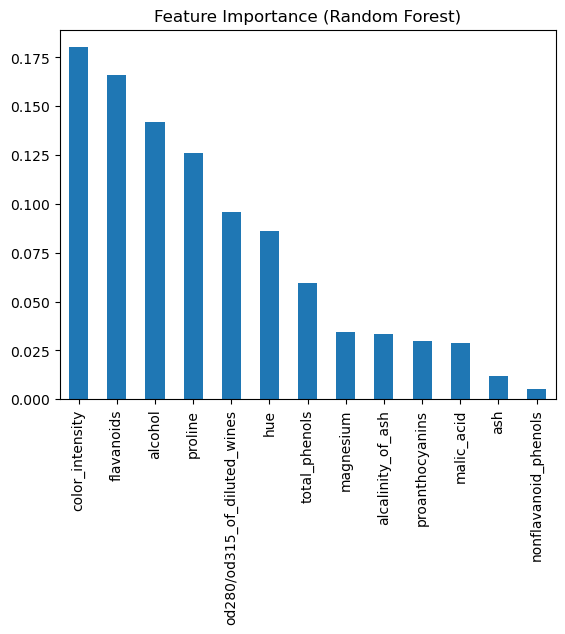

In [28]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest with OOB Score
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# OOB Score
oob_score = rf.oob_score_

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"OOB Score: {oob_score:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
import pandas as pd
feature_importance = pd.Series(rf.feature_importances_, index=wine.feature_names).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot Feature Importance
feature_importance.plot(kind='bar', title="Feature Importance (Random Forest)")
plt.show()


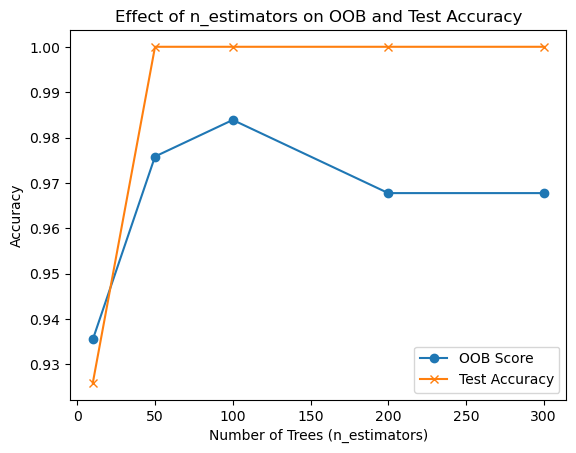

In [ ]:
# changing hyperparameters
n_estimators_range = [10, 50, 100, 200, 300]
oob_scores = []
test_accuracies = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_scores.append(rf.oob_score_)
    y_pred = rf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

# Plotting Results
plt.plot(n_estimators_range, oob_scores, label='OOB Score', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on OOB and Test Accuracy')
plt.legend()
plt.show()